# <u>***EDA and engineering of Quality***<u>

### ***1. EDA -- What makes a review a good review?***

#### <u>used dataset: review_1918.csv<u>

---
---

#### ***1.1 Import necessary modules***

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import string
import re

---

#### ***1.2 Set global parameters***

In [26]:
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['figure.dpi'] = 150

---

#### ***1.3 Import dataset***

In [3]:
df_rev = pd.read_csv('../data/yelp_dataset/review_1819.csv')

---

#### ***1.4 Overview of the dataset***

In [4]:
df_rev.shape

(1813646, 11)

In [5]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813646 entries, 0 to 1813645
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   review_id    object 
 2   user_id      object 
 3   business_id  object 
 4   stars        float64
 5   useful       int64  
 6   funny        int64  
 7   cool         int64  
 8   text         object 
 9   date         object 
 10  year         int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 152.2+ MB


In [6]:
df_rev.sample(10)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
1133967,4514053,nc2LEGpp_BnOoxM1ddu4Iw,m_ywwt_1LRneb1m-fYK1GQ,4LCFYf30OX54DdICqOUZZQ,1.0,0,0,0,An Absolute Disaster ! \nThey ruined my Bike. ...,2018-03-20 02:16:46,2018
399027,1658653,uoZEmoycPYtzlFtdunWy_g,EMP5ajaMBF8E5t_dpbnkKg,Ed5e1KqM3mihmexmVIjXwA,5.0,0,0,0,Exceeded my expectations. Everything was delic...,2018-04-25 00:38:39,2018
348413,1321409,pvYrl8i5raJ1kT4BMB7Ezw,EHkOfvfgot8tm0agVd5sFw,V_d4GDVAbbac-7AV4kUIUA,5.0,7,5,9,Last night here. Couldn't have asked for a bet...,2018-03-28 22:48:59,2018
1295199,5125678,arzU9vGWLOig_Ic5iDy5Hg,ID_1UKUVsljpEbZaeR9wDQ,F9cpl6igc4781OtbBWazKQ,5.0,1,0,0,We were delighted to dine here last night. The...,2018-03-30 23:27:56,2018
844478,3265876,ykVctqTbg_b2CUV8o05U7Q,hvJga-B55vY-aAQ_t5Fe8Q,T_GeXNYY_zO0WpJzBxQj4w,5.0,1,0,0,My sandwich (& my husband's) was absolutely pe...,2018-09-12 21:06:40,2018
1533396,5976516,tfpGKndg0JzL96k36nEnHg,D57rE-hTJwwgQ2zjSrFnjg,ALK-7tTvDKAzxAtIiNyh2A,5.0,0,0,1,The menu is different every time and always ha...,2018-09-14 22:16:58,2018
1071860,4133933,CPKy_q2NepbIh7Uy9OTT9Q,u5X7IUkMZWqeCx3Sz7ayzQ,3AZjEgNM6CiOePDKKAQWgA,2.0,1,1,0,"On this visit, we discovered that ""vegetarian""...",2018-07-20 22:59:37,2018
1432896,5508923,nuuKaq3Oh6xSZJ5r2e65CA,Xy7JHAiv3qmvNpWb-u0VIw,fRbVUEIiRWxP1QWiXTBmgQ,4.0,1,0,0,Went for the pizza buffet. It was very good. T...,2019-11-06 23:26:55,2019
858950,3303691,YyKgDHmDTbgBM6SCf37D5w,j7Ew20Kh33lFEaUXW1rGNw,zafEaH7VOUkd8-9wFlnlmw,4.0,2,0,0,Yeah it's touristy but it's a place you need t...,2019-05-05 15:24:46,2019
677838,2649648,05Ry-xO5Ye0BjUI_sbzsZg,YqXCKhTVyD2m7SZyPu8WEA,7T2QFFcqkrJdyK48HVCgFQ,5.0,0,0,0,I have been seeing Bao for my Melasma for over...,2018-12-28 00:47:41,2018


In [7]:
df_rev.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
year           0
dtype: int64

---

#### ***1.5 Cleaning the dataset***

In [8]:
# Dropping 'Unnamed: 0', 'date', 'year'

df_rev.drop(['Unnamed: 0', 'date', 'year'], axis=1, inplace=True)

---

#### ***1.6 Gain information on rating***

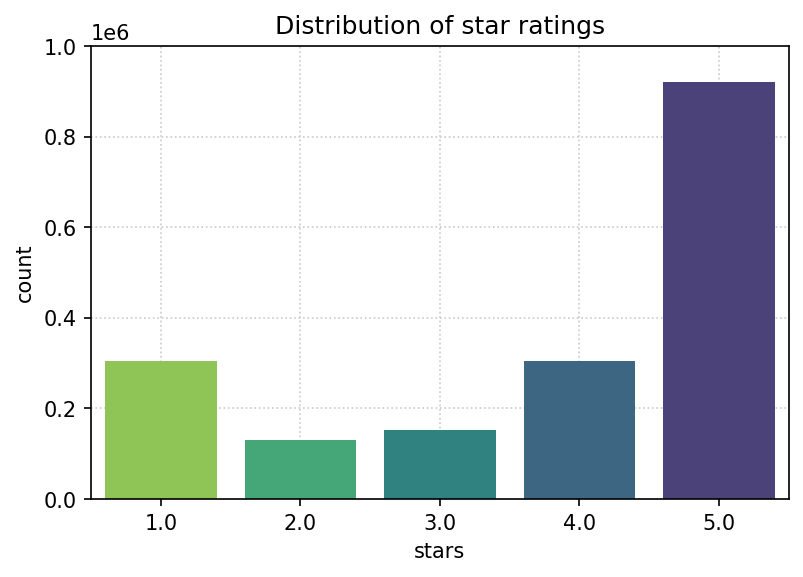

In [27]:
sns.countplot(data=df_rev, x='stars', palette='viridis_r', zorder=2)
plt.title('Distribution of star ratings')
plt.ylim(0, 1000000)
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

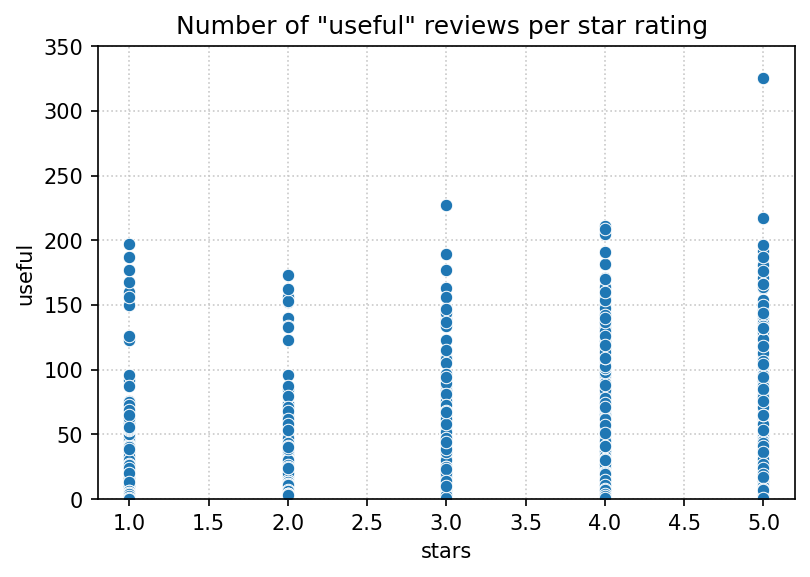

In [28]:
sns.scatterplot(data=df_rev, x='stars', y='useful', zorder=2)
plt.title('Number of "useful" reviews per star rating ')
plt.ylim(0, 350)
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

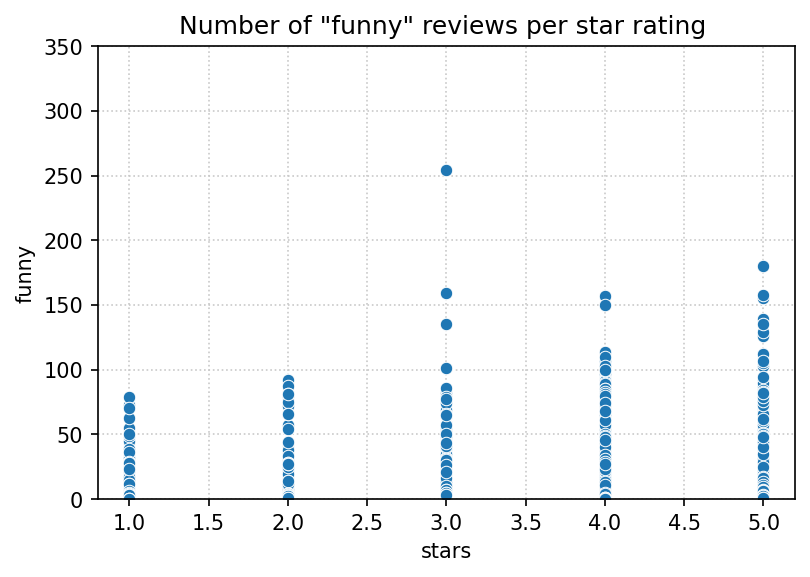

In [29]:
sns.scatterplot(data=df_rev, x='stars', y='funny', zorder=2)
plt.title('Number of "funny" reviews per star rating ')
plt.ylim(0, 350)
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

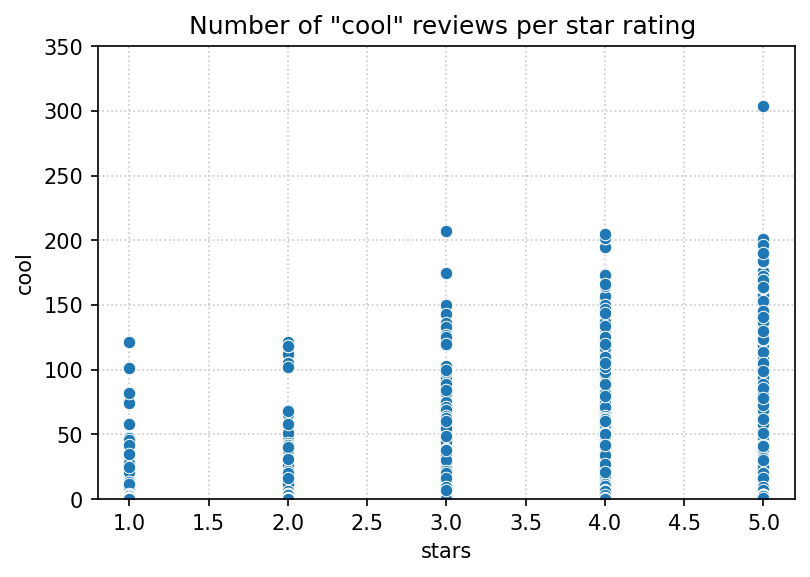

In [30]:
sns.scatterplot(data=df_rev, x='stars', y='cool', zorder=2)
plt.title('Number of "cool" reviews per star rating ')
plt.ylim(0, 350)
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

In [31]:
df_corr = df_rev.drop(['review_id', 'user_id', 'business_id'], axis=1)

<AxesSubplot:>

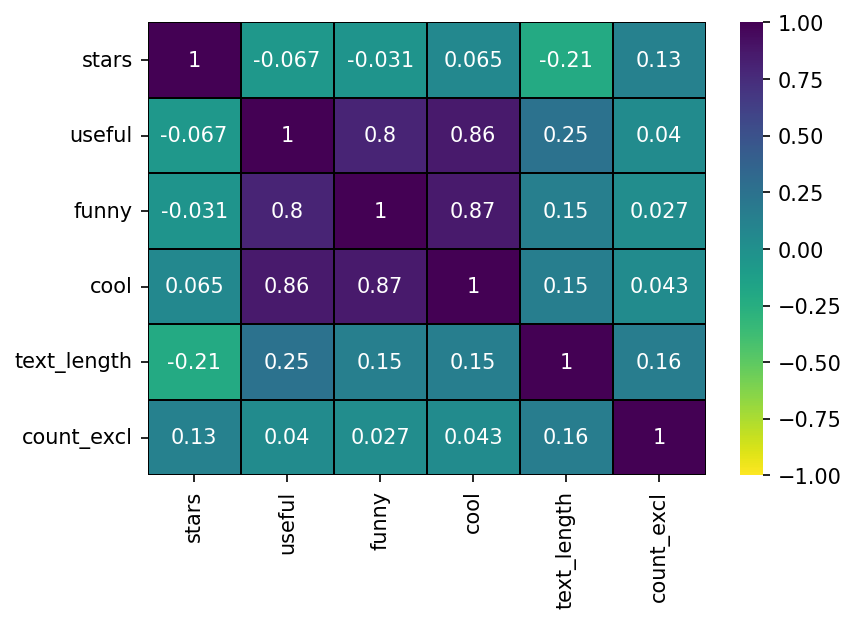

In [42]:
sns.heatmap(df_corr.corr(), annot=True, cmap='viridis_r', linewidth=0.01, linecolor='k', vmin=-1, vmax=1)

***Without considering the actual review message there is no useable correlation between star rating and usefulness of the reviews***

---

#### ***1.7 Gain information on texts***

In [33]:
# Get the length(including punctuation and spaces) of each review and save it to new column

df_rev['text_length'] = df_rev['text'].str.len()

In [34]:
# Get the number of used exclamation marks per review

df_rev['count_excl'] = df_rev['text'].str.count('!')

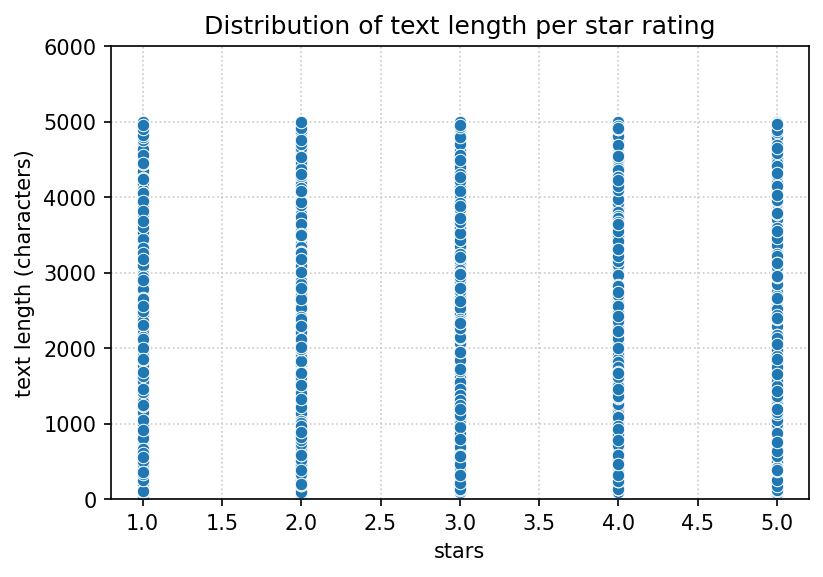

In [40]:
sns.scatterplot(data=df_rev, x='stars', y='text_length', zorder=2)
plt.title('Distribution of text length per star rating')
plt.ylim(0, 6000)
plt.ylabel('text length (characters)')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

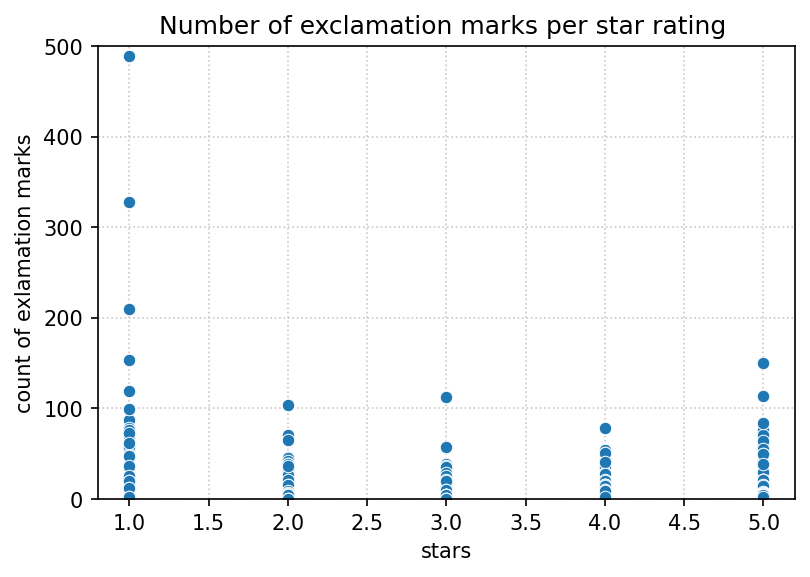

In [36]:
sns.scatterplot(data=df_rev, x='stars', y='count_excl', zorder=2)
plt.title('Number of exclamation marks per star rating ')
plt.ylim(0, 500)
plt.ylabel('count of exlamation marks')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

In [43]:
#df_rev[df_rev['count_excl'] > 450]
#df_rev['text'][156653]

In [38]:
df_corr_excl = df_rev.drop(['review_id', 'user_id', 'business_id'], axis=1)

<AxesSubplot:>

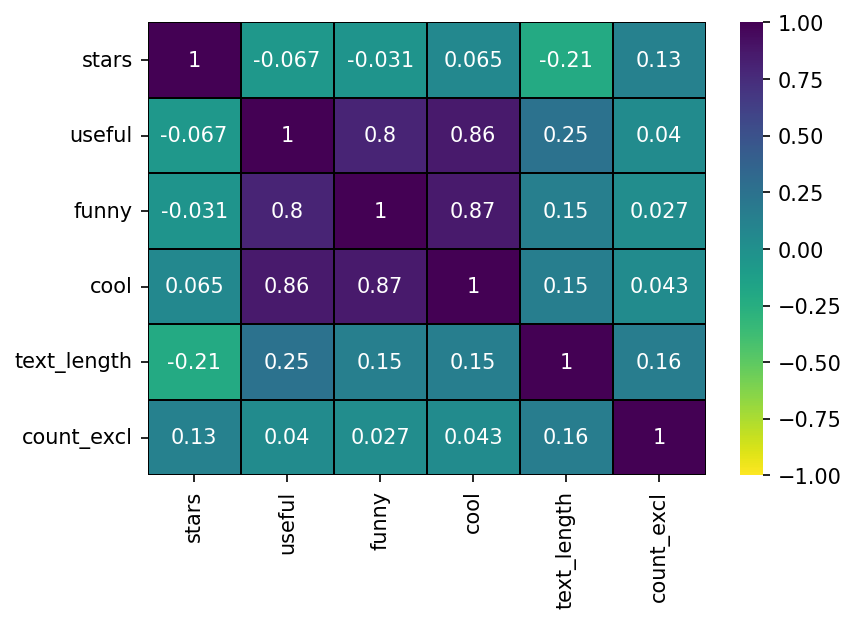

In [41]:
sns.heatmap(df_corr_excl.corr(), annot=True, cmap='viridis_r', linewidth=0.01, linecolor='k', vmin=-1, vmax=1)